In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5114 - accuracy: 0.4469 - val_loss: 1.2562 - val_accuracy: 0.5500
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1599 - accuracy: 0.5900 - val_loss: 1.0998 - val_accuracy: 0.6095
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9997 - accuracy: 0.6457 - val_loss: 0.9869 - val_accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9034 - accuracy: 0.6816 - val_loss: 0.9546 - val_accuracy: 0.6629
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8285 - accuracy: 0.7101 - val_loss: 0.8908 - val_accuracy: 0.6947
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7737 - accuracy: 0.7282 - val_loss: 0.8997 - val_accuracy: 0.6926
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7274 - accuracy: 0.7441 - val_loss: 0.8567 -

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 0.8408 - accuracy: 0.7251 - 2s/epoch - 7ms/step
Test accuracy: 0.7250999808311462


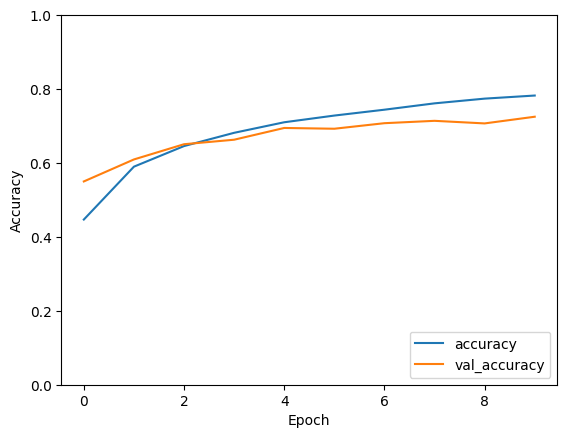

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

# Analysis

This notebook implements a simple CNN model for classifying images in the CIFAR-10 dataset.

- **Model**: The model is a sequential CNN with three convolutional layers and two max-pooling layers.
- **Dataset**: CIFAR-10 contains 60,000 32x32 color images in 10 classes, with 6,000 images per class.
- **Results**: The final accuracy on the test dataset is printed, and the accuracy over epochs is visualized.